### Creating An ANN using Pytorch

In [2]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import seaborn as sns
import numpy as np

In [7]:
df['Outcome'] =np.where(df['Outcome'] == 1, "Diabetic" , "No Diabetic")

In [9]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age      Outcome  
0                     0.627   50     Diabetic  
1                     0.351   31  No Diabetic  
2                     0.672   32     Diabetic  
3                     0.167   21  No Diabetic  
4                     2.288   33     Diabetic

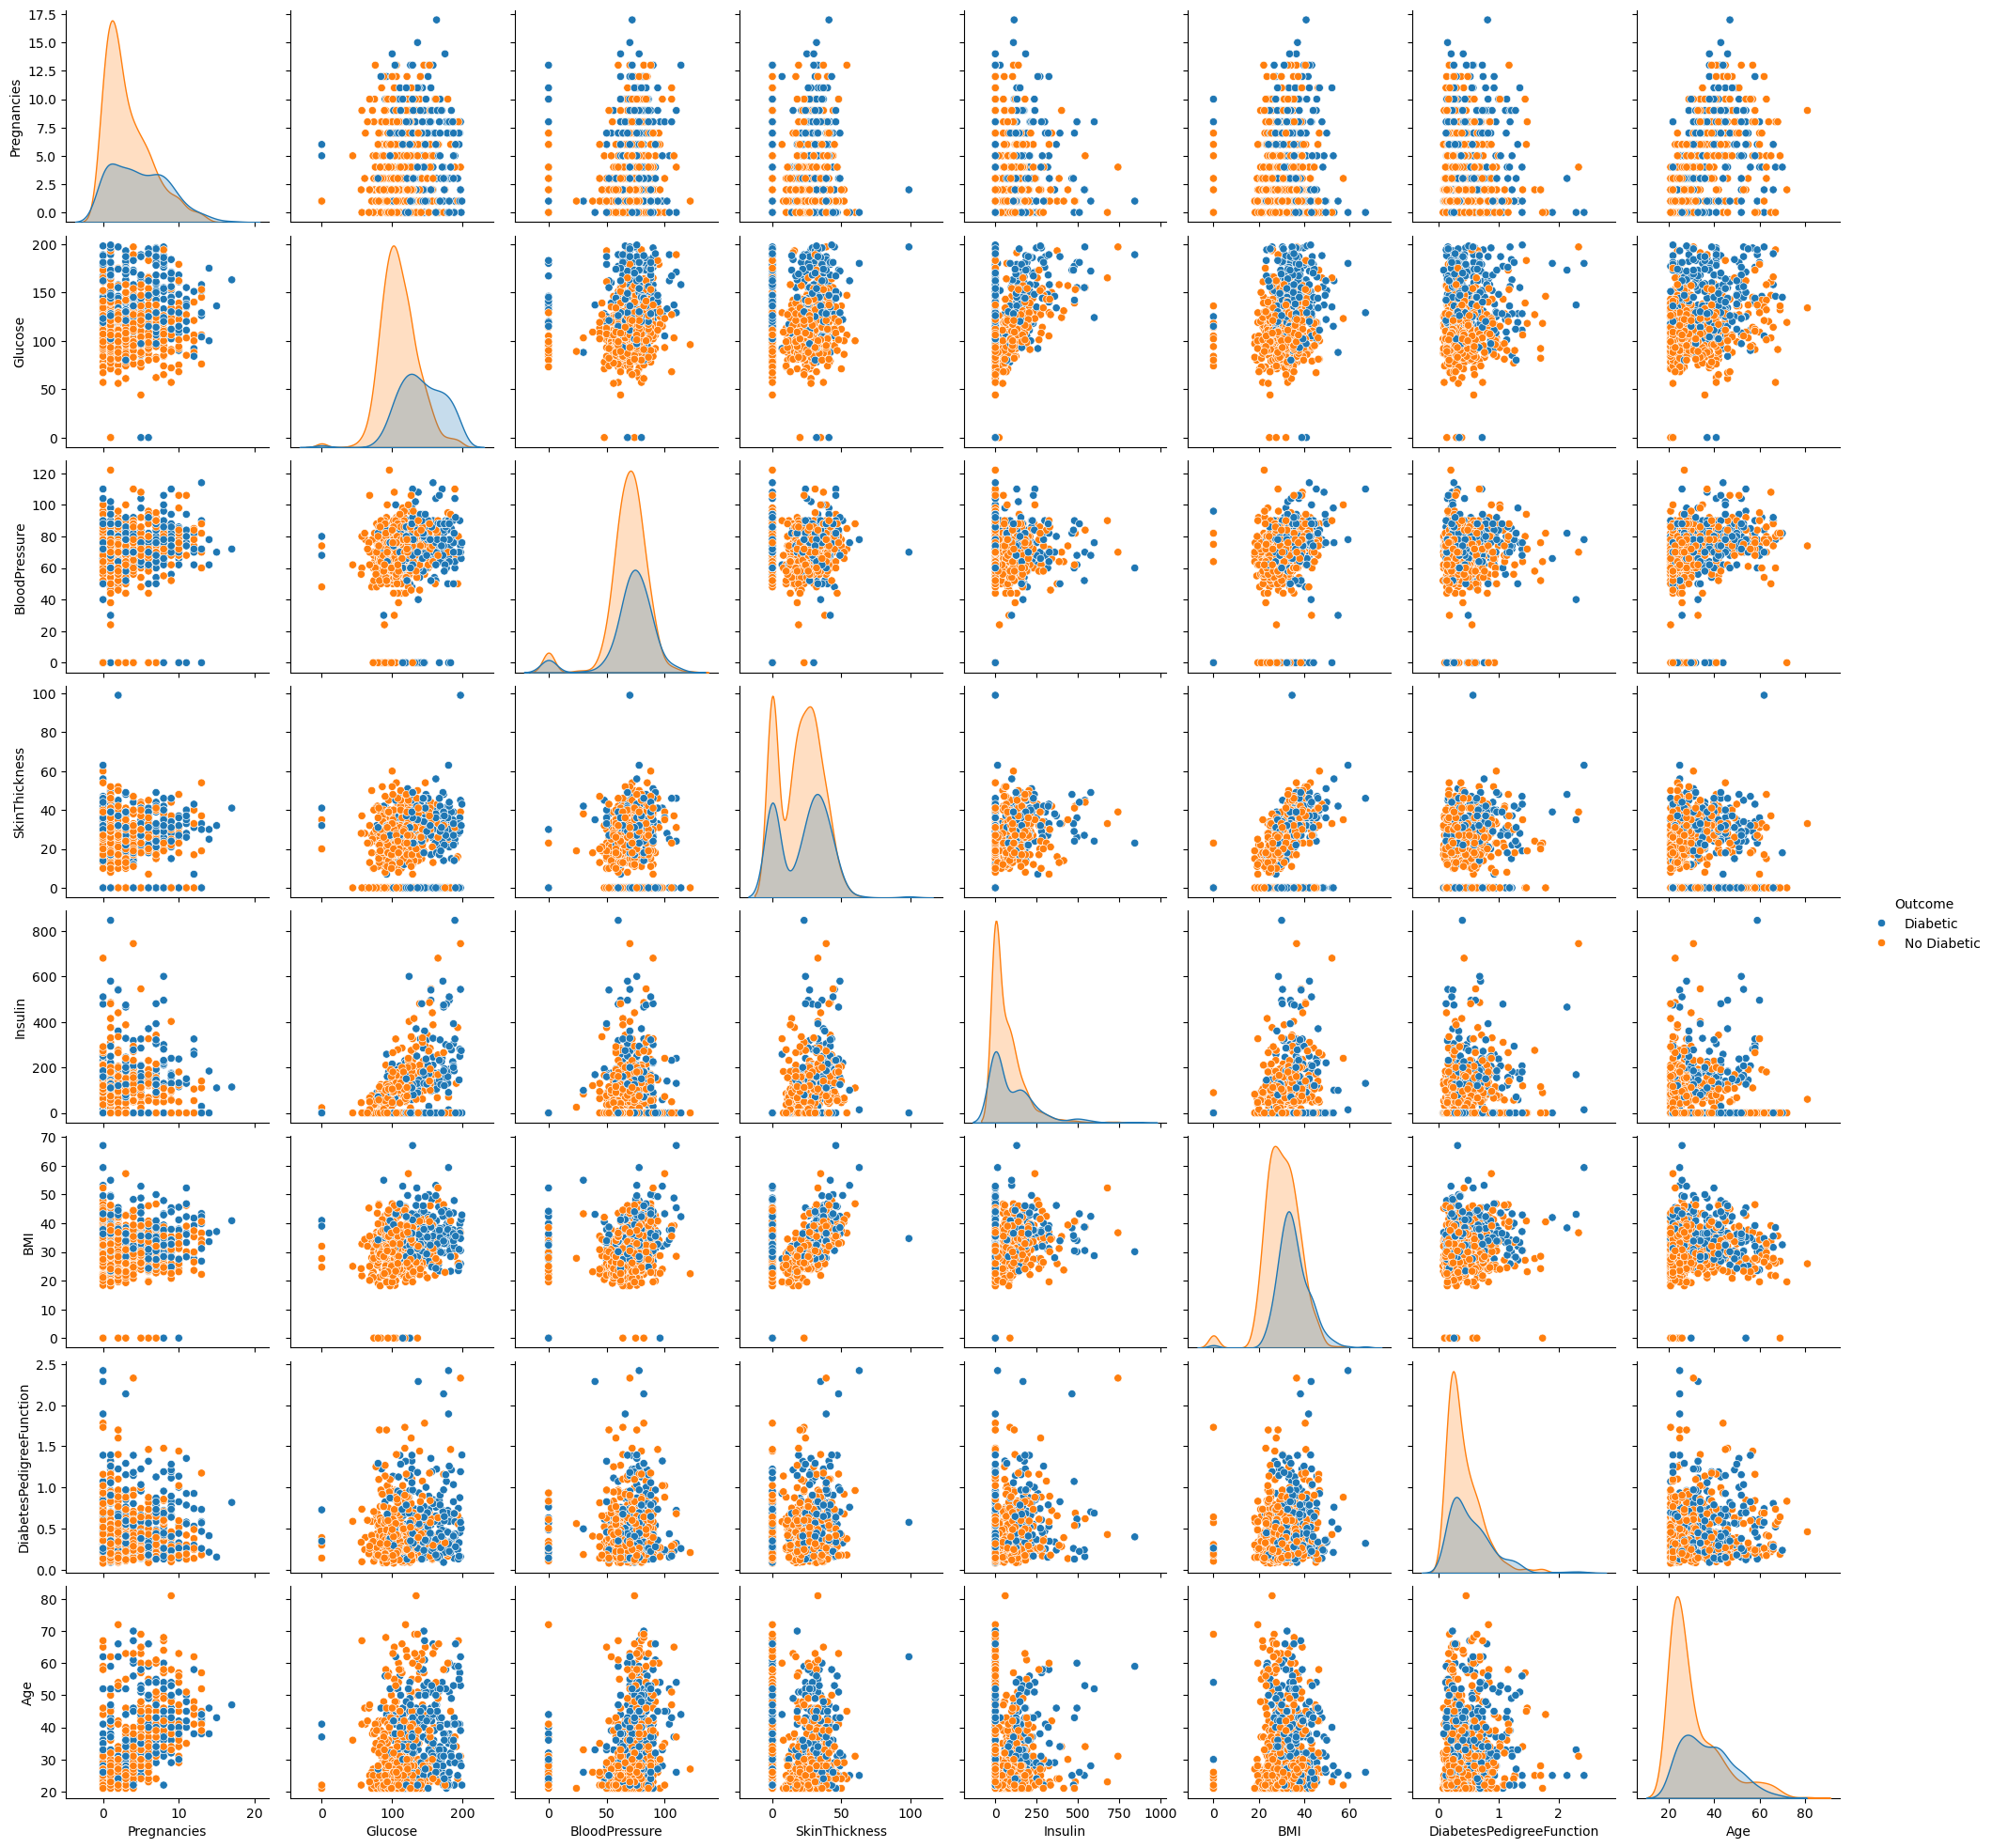

In [8]:
sns.pairplot(df,hue="Outcome")

In [10]:
df=pd.read_csv('diabetes.csv')
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [11]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [16]:
df.shape

(768, 9)

In [18]:
#### Creating Model with Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [19]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [51]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [52]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.19899755716323853
Epoch number: 11 and the loss : 0.19655489921569824
Epoch number: 21 and the loss : 0.2058790922164917
Epoch number: 31 and the loss : 0.1985320746898651
Epoch number: 41 and the loss : 0.21504805982112885
Epoch number: 51 and the loss : 0.21206459403038025
Epoch number: 61 and the loss : 0.21295784413814545
Epoch number: 71 and the loss : 0.19328813254833221
Epoch number: 81 and the loss : 0.22951537370681763
Epoch number: 91 and the loss : 0.2998562753200531
Epoch number: 101 and the loss : 0.20423465967178345
Epoch number: 111 and the loss : 0.21323446929454803
Epoch number: 121 and the loss : 0.19955651462078094
Epoch number: 131 and the loss : 0.19800308346748352
Epoch number: 141 and the loss : 0.1928519606590271
Epoch number: 151 and the loss : 0.20281144976615906
Epoch number: 161 and the loss : 0.19108854234218597
Epoch number: 171 and the loss : 0.21840880811214447
Epoch number: 181 and the loss : 0.2706492841243744
Epoch num

In [23]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
1
0
1
0
0
1
1
1
1
0
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
0
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0


In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[83, 24],
       [16, 31]], dtype=int64)

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(95.72222222222221, 0.5, 'Predicted Values')

In [61]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7402597402597403

In [62]:
#### Save the model
torch.save(model,'diabetes.pt')

In [63]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [64]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [65]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [66]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [67]:
new_data=torch.tensor(lst1)

In [68]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([2.8034, 7.1450])
1
